## Controlling for a covariate variable

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
%matplotlib inline

/opt/hdp/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
# possible predictive variable (predictor)
# can be a confounding or interacting variable
# could be something like region or country
covariate = np.random.choice([0,1], 1000)
#covariate[:50] = 1
#covariate[50:] = 0
# the actual explanotary variables (real predictor)
# could be something like education, which depends on the country
exposure_num = np.random.rand(1000) + 0.3 * covariate
exposure_cat = np.random.choice([0,1], 1000) + 2.5 * covariate
# target (could be something like salary)
outcome = 2 + (0.5 * exposure_num) + (0.7 * exposure_cat) + (0.25 * covariate) + (0.1 * np.random.randn(1000))

In [6]:
data = pd.DataFrame(data=[covariate, exposure_num, exposure_cat, outcome]).T
data.columns = ['covariate', 'exposure_num', 'exposure_cat', 'outcome']
data['const'] = 1

In [7]:
data.head()

,covariate,exposure_num,exposure_cat,outcome,const
0,1.0,0.960587,3.5,5.230364,1
1,0.0,0.349859,0.0,2.228640,1
2,0.0,0.448125,0.0,2.117283,1
3,1.0,0.940306,2.5,4.455767,1
4,0.0,0.625788,0.0,2.346679,1


In [8]:
target = data['outcome']
feature = data.drop(['outcome'], axis=1)

## Correlation Matrix

In [9]:
# partial R^2
data.corr()**2

,covariate,exposure_num,exposure_cat,outcome,const
covariate,1.000000,0.186444,0.857173,0.873667,NaN
exposure_num,0.186444,1.000000,0.168293,0.278377,NaN
exposure_cat,0.857173,0.168293,1.000000,0.972098,NaN
outcome,0.873667,0.278377,0.972098,1.000000,NaN
const,NaN,NaN,NaN,NaN,NaN


## Model Cov ~ Outcome

In [25]:
model1 = sm.OLS(target, feature[['covariate', 'const']]).fit()

In [26]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     7318.
Date:                Tue, 20 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:36:27   Log-Likelihood:                -491.10
No. Observations:                1000   AIC:                             986.2
Df Residuals:                     998   BIC:                             996.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
covariate      2.1416      0.025     85.546      0.000       2.092       2.191
const          2.5839      0.018    146.702      0.000       2.549       2.618
==============================================================================
Omnibus:                     1616.488   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.121
Skew:                           0.074   Prob(JB):                     9.79e-16
Kurtosis:                       1.721   Cond. No.                         2.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Complete Model

In [27]:
model2 = sm.OLS(target, feature).fit()

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 4.266e+04
Date:                Tue, 20 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:37:21   Log-Likelihood:                 880.61
No. Observations:                1000   AIC:                            -1753.
Df Residuals:                     996   BIC:                            -1734.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
covariate        0.2697      0.017     15.607      0.000       0.236       0.304
exposure_num     0.4981      0.011     44.762      0.000       0.476       0.520
exposure_cat     0.6935      0.006    108.763      0.000       0.681       0.706
const            2.0003      0.008    259.216      0.000       1.985       2.015
==============================================================================
Omnibus:                        0.838   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.731
Skew:                           0.057   Prob(JB):                        0.694
Kurtosis:                       3.066   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Subtract Model 1 from Outcome

In [29]:
results = data.copy()

In [30]:
results['outcome_adjusted'] = model1.predict(feature[['covariate', 'const']]) - results.outcome

## visualizations

/opt/hdp/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


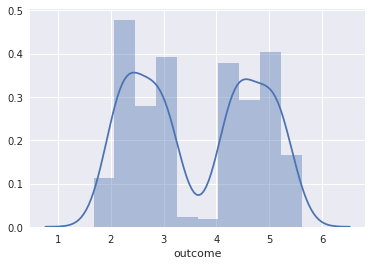

In [33]:
sns.distplot(results['outcome'])

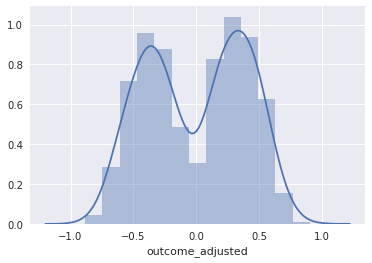

In [34]:
sns.distplot(results['outcome_adjusted'])

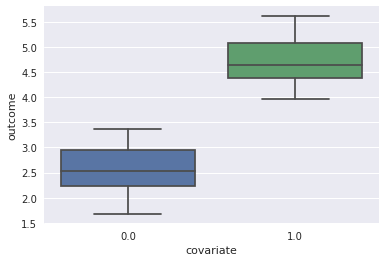

In [35]:
sns.boxplot(data=results, x='covariate', y='outcome')

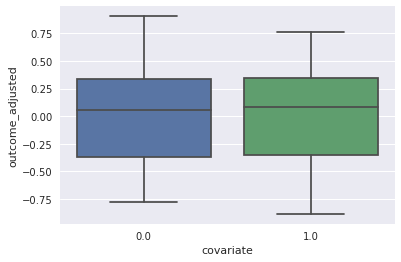

In [36]:
sns.boxplot(data=results, x='covariate', y='outcome_adjusted')

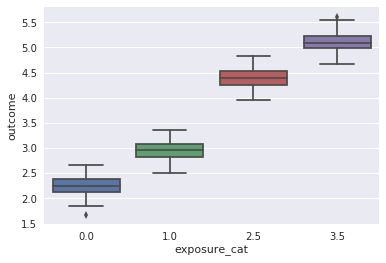

In [37]:
sns.boxplot(data=results, x='exposure_cat', y='outcome')

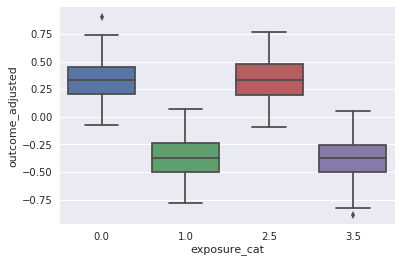

In [38]:
# like expected, maybe better to add an interaction term and not to create 4 different categories
sns.boxplot(data=results, x='exposure_cat', y='outcome_adjusted')

In [42]:
results.groupby(by='exposure_cat').median()

,covariate,exposure_num,outcome,const,outcome_adjusted
exposure_cat,,,,,
0.0,0.0,0.504065,2.254118,1,0.329760
1.0,0.0,0.560739,2.958688,1,-0.374810
2.5,1.0,0.767851,4.391472,1,0.333986
3.5,1.0,0.786770,5.094799,1,-0.369342


## random forest regression test

In [2]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf1 = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [24]:
rf1.fit(X=feature[['covariate']], y=target)
rf2.fit(X=feature[['covariate', 'exposure_cat']], y=target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [25]:
results = data.copy()

In [26]:
results['outcome_adj_rf'] = rf1.predict(feature[['covariate']]) - data.outcome
results['outcome_adj_rf2'] = rf2.predict(feature[['covariate', 'exposure_cat']]) - data.outcome

In [27]:
results.head()

,covariate,exposure_num,exposure_cat,outcome,const,outcome_adj_rf,outcome_adj_rf2
0,1.0,0.960587,3.5,5.230364,1,-0.504101,-0.109745
1,0.0,0.349859,0.0,2.228640,1,0.397556,0.030023
2,0.0,0.448125,0.0,2.117283,1,0.508912,0.141380
3,1.0,0.940306,2.5,4.455767,1,0.270497,-0.073228
4,0.0,0.625788,0.0,2.346679,1,0.279517,-0.088016


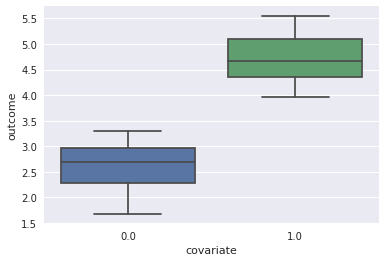

In [28]:
sns.boxplot(data=results, x='covariate', y='outcome')

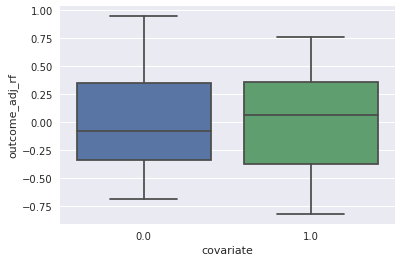

In [29]:
sns.boxplot(data=results, x='covariate', y='outcome_adj_rf')

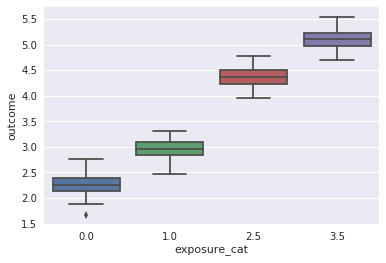

In [30]:
sns.boxplot(data=results, x='exposure_cat', y='outcome')

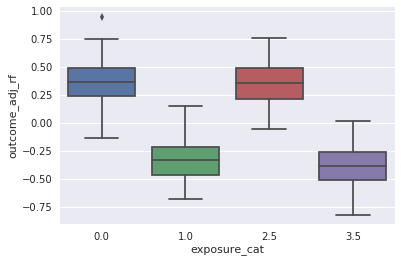

In [31]:
sns.boxplot(data=results, x='exposure_cat', y='outcome_adj_rf')

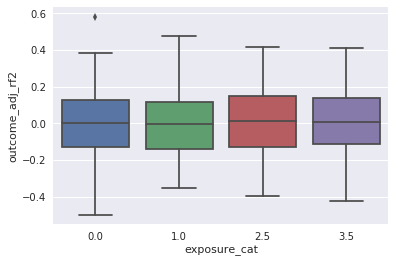

In [32]:
sns.boxplot(data=results, x='exposure_cat', y='outcome_adj_rf2')

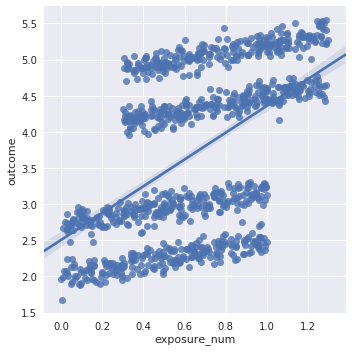

In [20]:
sns.lmplot(data=results, x='exposure_num', y='outcome')

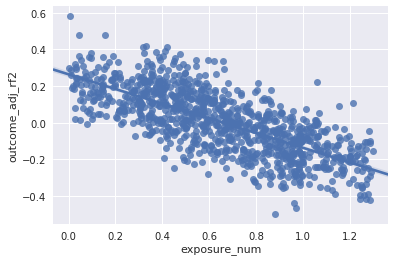

In [34]:
sns.regplot(data=results, x='exposure_num', y='outcome_adj_rf2')

In [38]:
final = sm.OLS(results['outcome_adj_rf2'], results[['exposure_num', 'const']]).fit()

In [39]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        outcome_adj_rf2   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     1119.
Date:                Tue, 20 Feb 2018   Prob (F-statistic):          3.47e-165
Time:                        16:13:06   Log-Likelihood:                 694.38
No. Observations:                1000   AIC:                            -1385.
Df Residuals:                     998   BIC:                            -1375.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
exposure_num    -0.4003      0.012    -33.456      0.000      -0.424      -0.377
const            0.2643      0.009     30.531      0.000       0.247       0.281
==============================================================================
Omnibus:                        0.378   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.828   Jarque-Bera (JB):                0.468
Skew:                           0.009   Prob(JB):                        0.792
Kurtosis:                       2.896   Cond. No.                         4.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Test

In [45]:
# possible predictive variable (predictor)
# can be a confounding or interacting variable
# could be something like region or country
covariate = np.random.choice([0,1], 1000)
#covariate[:50] = 1
#covariate[50:] = 0
# the actual explanotary variables (real predictor)
# could be something like education, which depends on the country
exposure_num = np.random.rand(1000) + 0.3 * covariate
exposure_cat = np.random.choice([0,1], 1000) + 2.5 * covariate
# target (could be something like salary)
outcome = 2 + (0.5 * exposure_num) + (0.7 * exposure_cat) + (0.25 * covariate) + 0.5 * (covariate * exposure_cat) - 0.8 * (covariate * exposure_num) + (0.1 * np.random.randn(1000))

In [46]:
data = pd.DataFrame(data=[covariate, exposure_num, exposure_cat, outcome]).T
data.columns = ['covariate', 'exposure_num', 'exposure_cat', 'outcome']
data['const'] = 1

In [47]:
target = data['outcome']
feature = data.drop(['outcome'], axis=1)

In [48]:
rf1.fit(X=feature[['covariate']], y=target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
results = data.copy()
results['outcome_adj_rf'] = rf1.predict(feature[['covariate']]) - data.outcome

In [51]:
results.head()

,covariate,exposure_num,exposure_cat,outcome,const,outcome_adj_rf
0,1.0,0.659590,3.5,6.346034,1,-0.722773
1,0.0,0.288873,0.0,2.018719,1,0.554410
2,0.0,0.216279,0.0,2.260010,1,0.313119
3,1.0,0.627837,3.5,6.340457,1,-0.717196
4,1.0,0.376087,2.5,5.183819,1,0.439442


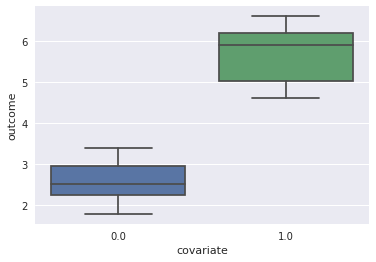

In [52]:
sns.boxplot(data=results, x='covariate', y='outcome')

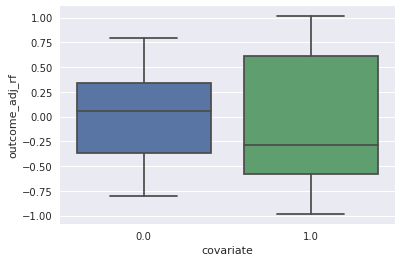

In [53]:
sns.boxplot(data=results, x='covariate', y='outcome_adj_rf')

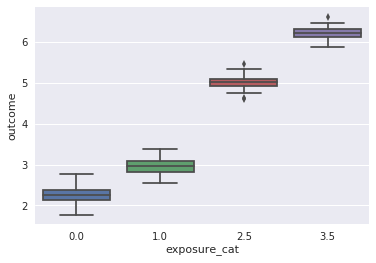

In [54]:
sns.boxplot(data=results, x='exposure_cat', y='outcome')

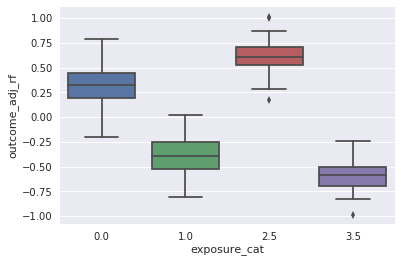

In [55]:
sns.boxplot(data=results, x='exposure_cat', y='outcome_adj_rf')

In [56]:
model1 = sm.OLS(target, feature[['covariate', 'const']]).fit()

In [57]:
results['outcome_adjusted'] = model1.predict(feature[['covariate', 'const']]) - results.outcome

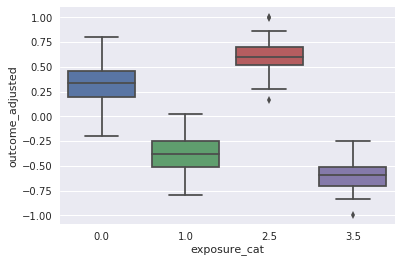

In [58]:
sns.boxplot(data=results, x='exposure_cat', y='outcome_adjusted')